INSTAGRAM REACH ANALYSIS by Pritam Biswas

In [3]:
#Let's dive into analyzing and predicting Instagram post reach using machine learning in Python. 
#For a content creator to thrive on Instagram in the long run, understanding and leveraging their reach data is essential.

In [4]:
#Import the necessary Python Libraries-

import numpy as np
import  pandas as pd
import  matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from sklearn.model_selection import train_test_split
from sklearn.linear_model import PassiveAggressiveRegressor

In [5]:
#load the Instagram data from the CSV file to read-


data = pd.read_csv("C:/Users/prasa/Downloads/Compressed/archive_4/Instagram data.csv", encoding='Latin1')
print(data.head())

#Let's see if there is any null value present in the dataset-

data.isnull().sum()

#if there is any null value this will remove all of it-

data=data.dropna()


data.info()

   Impressions  From Home  From Hashtags  From Explore  From Other  Saves  \
0         3920       2586           1028           619          56     98   
1         5394       2727           1838          1174          78    194   
2         4021       2085           1188             0         533     41   
3         4528       2700            621           932          73    172   
4         2518       1704            255           279          37     96   

   Comments  Shares  Likes  Profile Visits  Follows  \
0         9       5    162              35        2   
1         7      14    224              48       10   
2        11       1    131              62       12   
3        10       7    213              23        8   
4         5       4    123               8        0   

                                             Caption  \
0  Here are some of the most important data visua...   
1  Here are some of the best data science project...   
2  Learn how to train a machine learni

c:\Users\prasa\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


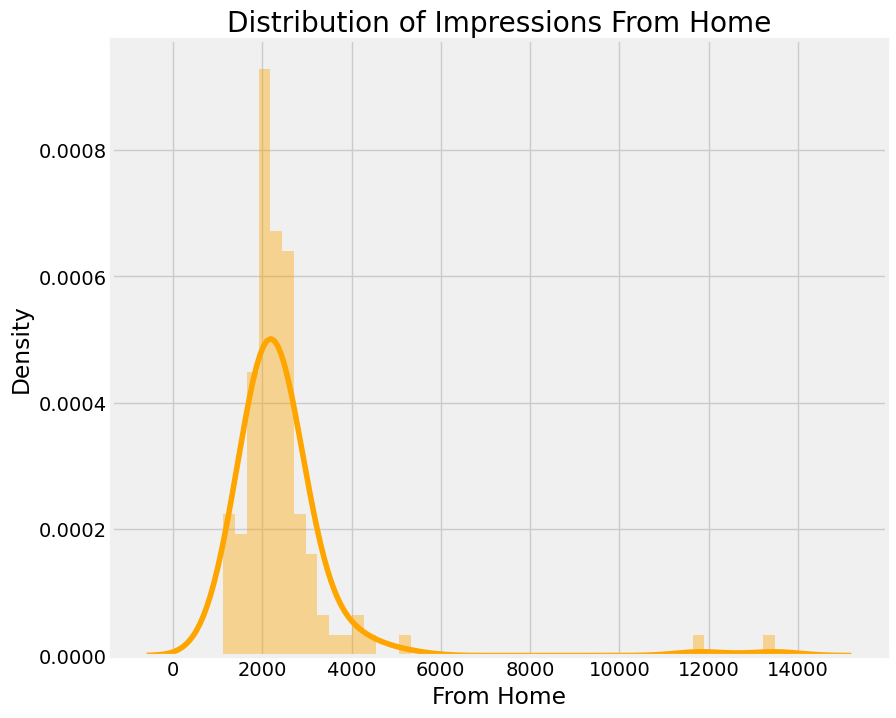

In [6]:
#Let's first take a look at the distribution of impressions received from the home section-


plt.figure(figsize=(10,8))
plt.style.use('fivethirtyeight')
plt.title("Distribution of Impressions From Home")
sns.distplot(data['From Home'], color='orange')
plt.show()

c:\Users\prasa\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


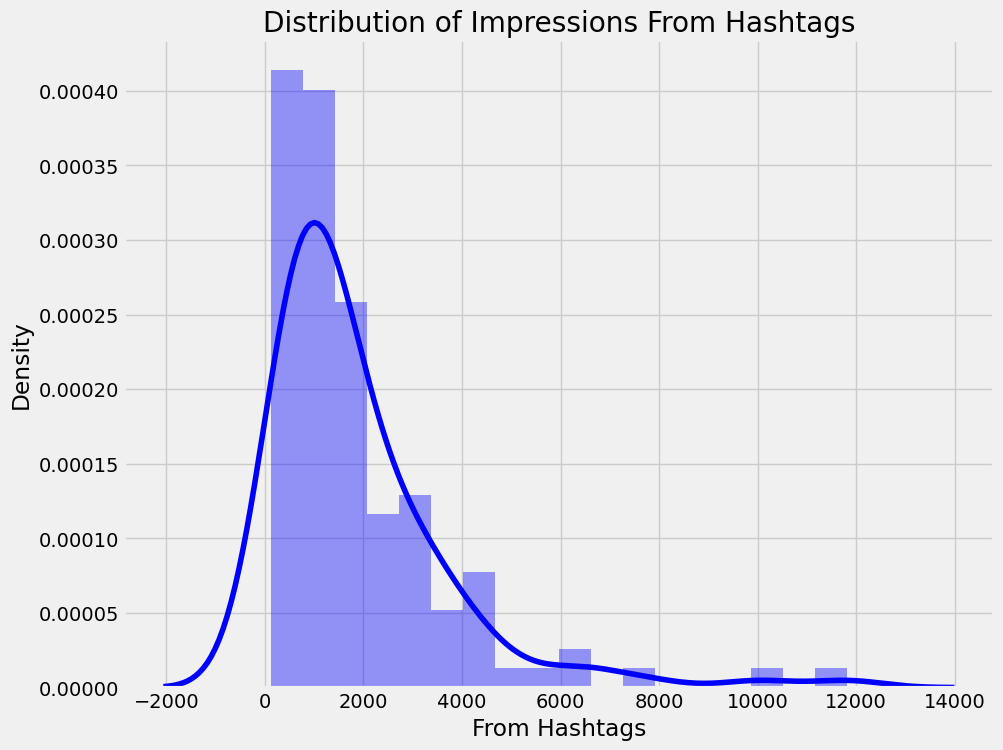

In [7]:
#Now let’s have a look at the distribution of the impressions received from the hashtags-


plt.figure(figsize=(10, 8))
plt.title("Distribution of Impressions From Hashtags")
sns.distplot(data['From Hashtags'], color='blue')
plt.show()

c:\Users\prasa\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


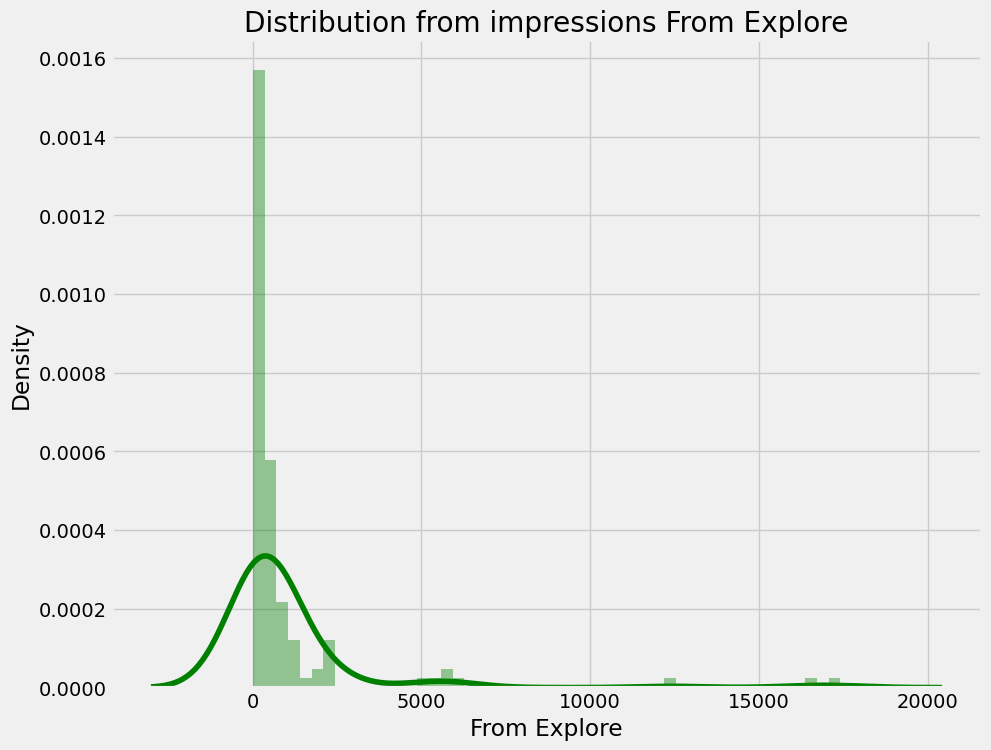

In [8]:
#Also let’s have a look at the distribution of impressions I have received from the explore section of Instagram-


plt.figure(figsize=(10,8))
plt.title("Distribution from impressions From Explore")
sns.distplot(data['From Explore'], color='green')
plt.show()

In [9]:
#let’s have a look at the percentage of impressions from various sources on Instagram-


home=data["From Home"].sum()
explore=data["From Explore"].sum()
hashtags=data["From Hashtags"].sum()
other=data["From Other"].sum()

In [10]:
labels=["From Home","From Explore","From Hashtags","From Other"]
values=[home,explore,hashtags,other]

In [11]:
#Now, visualize the percentage of impressions using a pie chart-

fig=px.pie(data,values=values,names=labels,title="Percentage of Impressions from various sources",hole=0.5,color_discrete_sequence=["orange", "green", "blue", "yellow"])
fig.show()

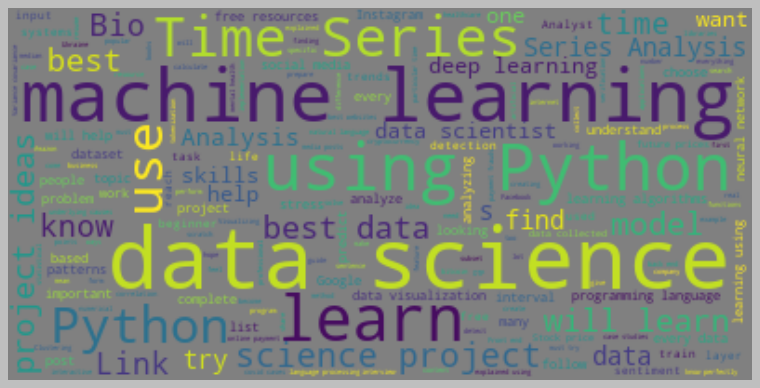

In [12]:
#Create a word-cloud from the caption column to visualize the most frequently used words in Instagram post captions-


text = " ".join(i for i in data.Caption)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="grey").generate(text)
plt.style.use('classic')
plt.figure( figsize=(12,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [13]:
#look at the relationship between the number of likes and the number of impressions on Instagram posts-


figure = px.scatter(data_frame = data, x="Impressions",
                    y="Likes", size="Likes", trendline="ols", 
                    title = "RB Likes and Impressions")
figure.show()

In [14]:
#See the relationship between the number of comments and the number of impressions on Instagram posts-



figure = px.scatter(data_frame = data, x="Impressions",
                    y="Comments", size="Comments", trendline="ols", 
                    title = "RB Comments and Total Impressions")
figure.show()

In [15]:
#let’s have a look at the relationship between the number of saves and the number of impressions-


figure = px.scatter(data_frame = data, x="Impressions",
                    y="Saves", size="Saves", trendline="ols", 
                    title = "Relationship Between Post Saves and Total Impressions")
figure.show()

In [16]:
#Now let’s have a look at the correlation of all the columns with the Impressions column-


correlation = data.corr()
print(correlation["Impressions"].sort_values(ascending=False))

Impressions       1.000000
From Explore      0.893607
Follows           0.889363
Likes             0.849835
From Home         0.844698
Saves             0.779231
Profile Visits    0.760981
Shares            0.634675
From Other        0.592960
From Hashtags     0.560760
Comments         -0.028524
Name: Impressions, dtype: float64


In [17]:
#let’s have a look at the conversation rate of my Instagram account, to calculate conversion rate I used (Follows/Profile Visits) * 100


conversion_rate = (data["Follows"].sum() / data["Profile Visits"].sum()) * 100
print(conversion_rate)

41.00265604249668


In [18]:
#So the conversation rate of my Instagram account is 41% which sounds like a very good conversation rate, 
#Let’s have a look at the relationship between the total profile visits and the number of followers gained from all profile visits:

figure = px.scatter(data_frame = data, x="Profile Visits",
                    y="Follows", size="Follows", trendline="ols", 
                    title = "RB Profile Visits and Followers Gained")
figure.show()


In [19]:
#The relationship between profile visits and followers gained is also linear.

REACH PREDICTION MODEL

In [20]:
#I will train a machine learning model to predict the reach of an Instagram post. 
#Let’s split the data into training and test sets before training the model-


x = np.array(data[['Likes', 'Saves', 'Comments', 'Shares', 
                   'Profile Visits', 'Follows']])
y = np.array(data["Impressions"])
xtrain, xtest, ytrain, ytest = train_test_split(x, y, 
                                                test_size=0.3, 
                                                random_state=21)

In [21]:
model = PassiveAggressiveRegressor()
model.fit(xtrain, ytrain)
model.score(xtest, ytest)

0.7924733697265642

In [22]:
#let’s predict the reach of an Instagram post by giving inputs to the machine learning model-


features = np.array([[248.0, 200.0, 3.0, 7.0, 110.0, 35.0]])
model.predict(features)


array([8608.45059511])